In [68]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas
import seaborn as sns 
from sklearn import preprocessing
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
import re
import string
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
import pandas as pd

data = pd.read_csv('phrase.csv')

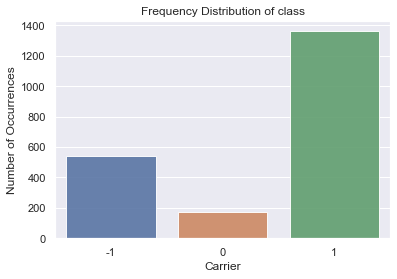

In [3]:
carrier_count = data["class"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of class')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

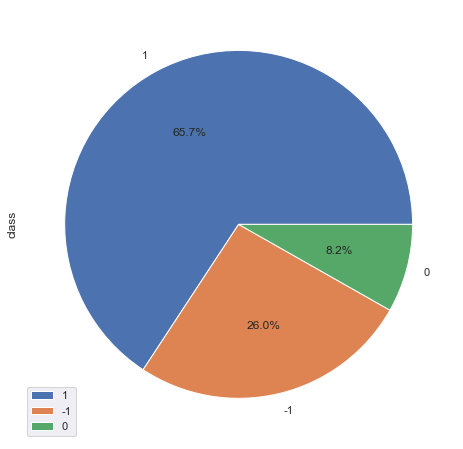

In [4]:
data["class"].value_counts().head(3).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

In [5]:
data["class"].value_counts()

 1    1361
-1     539
 0     170
Name: class, dtype: int64

In [6]:
nltk.word_tokenize(data["phrase"][0])

['الدليل',
 'على',
 'ارهاب',
 'حزب',
 'الله',
 'ان',
 'الناشط',
 'والحاقد',
 'لقمان',
 'سليم',
 'يدعو',
 'الى',
 'شن',
 'حرب',
 'على',
 'الطائفة',
 'الشيعية',
 'لاصابتها',
 'بنكبة']

In [7]:
data["phrase"][0]

'الدليل على ارهاب حزب الله ان الناشط والحاقد لقمان سليم يدعو الى شن حرب على الطائفة الشيعية لاصابتها بنكبة'

In [8]:
# Tokenize using the white spaces
nltk.tokenize.WhitespaceTokenizer().tokenize(data["phrase"][0])


['الدليل',
 'على',
 'ارهاب',
 'حزب',
 'الله',
 'ان',
 'الناشط',
 'والحاقد',
 'لقمان',
 'سليم',
 'يدعو',
 'الى',
 'شن',
 'حرب',
 'على',
 'الطائفة',
 'الشيعية',
 'لاصابتها',
 'بنكبة']

In [9]:
# Tokenize using Punctuations
nltk.tokenize.WordPunctTokenizer().tokenize(data["phrase"][0])

['الدليل',
 'على',
 'ارهاب',
 'حزب',
 'الله',
 'ان',
 'الناشط',
 'والحاقد',
 'لقمان',
 'سليم',
 'يدعو',
 'الى',
 'شن',
 'حرب',
 'على',
 'الطائفة',
 'الشيعية',
 'لاصابتها',
 'بنكبة']

In [10]:
#Tokenization using grammer rules
nltk.tokenize.TreebankWordTokenizer().tokenize(data["phrase"][0])


['الدليل',
 'على',
 'ارهاب',
 'حزب',
 'الله',
 'ان',
 'الناشط',
 'والحاقد',
 'لقمان',
 'سليم',
 'يدعو',
 'الى',
 'شن',
 'حرب',
 'على',
 'الطائفة',
 'الشيعية',
 'لاصابتها',
 'بنكبة']

In [11]:
words  = nltk.tokenize.WhitespaceTokenizer().tokenize(data["phrase"][0])
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(words)

In [12]:
#porter's stemmer
porterStemmedWords = [nltk.stem.PorterStemmer().stem(word) for word in words]
df['PorterStemmedWords'] = pd.Series(porterStemmedWords)

In [13]:
#SnowBall stemmer
snowballStemmedWords = [nltk.stem.SnowballStemmer("arabic").stem(word) for word in words]
df['SnowballStemmedWords'] = pd.Series(snowballStemmedWords)
df

,OriginalWords,PorterStemmedWords,SnowballStemmedWords
0,الدليل,الدليل,دليل
1,على,على,على
2,ارهاب,ارهاب,ارهاب
3,حزب,حزب,حزب
4,الله,الله,الله
5,ان,ان,ان
6,الناشط,الناشط,ناشط
7,والحاقد,والحاقد,حاقد
8,لقمان,لقمان,لقما
9,سليم,سليم,سليم


In [14]:
#LEMMATIZATION
words  = nltk.tokenize.WhitespaceTokenizer().tokenize(data["phrase"][0])
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(words)


In [15]:
#WordNet Lemmatization
wordNetLemmatizedWords = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in words]
df['WordNetLemmatizer'] = pd.Series(wordNetLemmatizedWords)
df

,OriginalWords,WordNetLemmatizer
0,الدليل,الدليل
1,على,على
2,ارهاب,ارهاب
3,حزب,حزب
4,الله,الله
5,ان,ان
6,الناشط,الناشط
7,والحاقد,والحاقد
8,لقمان,لقمان
9,سليم,سليم


In [16]:
print(len(data))

2070


In [17]:
data['phrase'].head()

0    الدليل على ارهاب حزب الله ان الناشط والحاقد لق...
1    كنتم قرفنا بأناشيدكم اللي كلها ارهاب وقتل كلها...
2    كل العالم يعلم أن بشار يقصف بالكيماوي ويقتل ال...
3    ارهاب اردوغان لشعبه وجيشه بحجة مسرحية الانقلاب...
4    حتى الذي ينقذ الجرحى يتم استهدافه في الغوطة ال...
Name: phrase, dtype: object

In [18]:
data[data.isnull().any(axis=1)].head()

,phrase,class


In [19]:
np.sum(data.isnull().any(axis=1))

0

In [20]:
for letter in '#.][!XR':
    data['phrase'] = data['phrase'].astype(str).str.replace(letter,'')

In [21]:
data.head()

,phrase,class
0,الدليل على ارهاب حزب الله ان الناشط والحاقد لق...,1
1,كنتم قرفنا بأناشيدكم اللي كلها ارهاب وقتل كلها...,0
2,كل العالم يعلم أن بشار يقصف بالكيماوي ويقتل ال...,0
3,ارهاب اردوغان لشعبه وجيشه بحجة مسرحية الانقلاب...,1
4,حتى الذي ينقذ الجرحى يتم استهدافه في الغوطة ال...,0


In [22]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

In [23]:
def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


In [24]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [25]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [26]:
def processPost(tweet): 

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
     #tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)
    
    return tweet


In [27]:
data["phrase"] = data["phrase"].apply(lambda x: processPost(x)) # apply used to call the method processpost

In [28]:
tokenizer = RegexpTokenizer(r'\w+')
data["phrase"] = data["phrase"].apply(tokenizer.tokenize)


In [29]:
data["phrase"].head()

0    [الدليل, على, ارهاب, حزب, اله, ان, الناشط, وال...
1    [كنتم, قرفنا, بأناشيدكم, الي, كلها, ارهاب, وقت...
2    [كل, العالم, يعلم, أن, بشار, يقصف, بالكيماوي, ...
3    [ارهاب, اردوغان, لشعبه, وجيشه, بحجة, مسرحية, ا...
4    [حتى, الذي, ينقذ, الجرحى, يتم, استهدافه, في, ا...
Name: phrase, dtype: object

In [30]:
stopwords_list = stopwords.words('arabic')

In [31]:
stopwords_list


['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [32]:
print(len(stopwords_list))

248


In [33]:
print(type(stopwords_list))

<class 'list'>


In [34]:
listToStr = ' '.join([str(elem) for elem in stopwords_list]) 


In [35]:
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

In [36]:
data['phrase']=data['phrase'].apply(lambda x: [item for item in x if item not in stopwords_list])

In [37]:
all_words = [word for tokens in data['phrase'] for word in tokens]

In [38]:
sentence_lengths = [len(tokens) for tokens in data['phrase']]


In [39]:
VOCAB = sorted(list(set(all_words)))

In [40]:
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

17629 words total, with a vocabulary size of 8381


In [41]:
print("Max sentence length is %s" % max(sentence_lengths))


Max sentence length is 45


In [42]:
counter = Counter(all_words)

In [43]:
counter.most_common(25)


[('اله', 254),
 ('و', 175),
 ('بشار', 110),
 ('انت', 109),
 ('ابن', 85),
 ('الصهيوني', 85),
 ('يانجس', 80),
 ('ان', 79),
 ('القطري', 70),
 ('الي', 67),
 ('الإرهابي', 66),
 ('ياعديم', 63),
 ('ياكلب', 60),
 ('ياحقير', 59),
 ('ياقذر', 52),
 ('ك', 51),
 ('منك', 47),
 ('يلعنك', 47),
 ('المليشيات', 44),
 ('يامتطرف', 44),
 ('الشرف', 40),
 ('انا', 39),
 ('يوما', 37),
 ('انتم', 36),
 ('واله', 36)]

In [44]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

<BarContainer object of 25 artists>

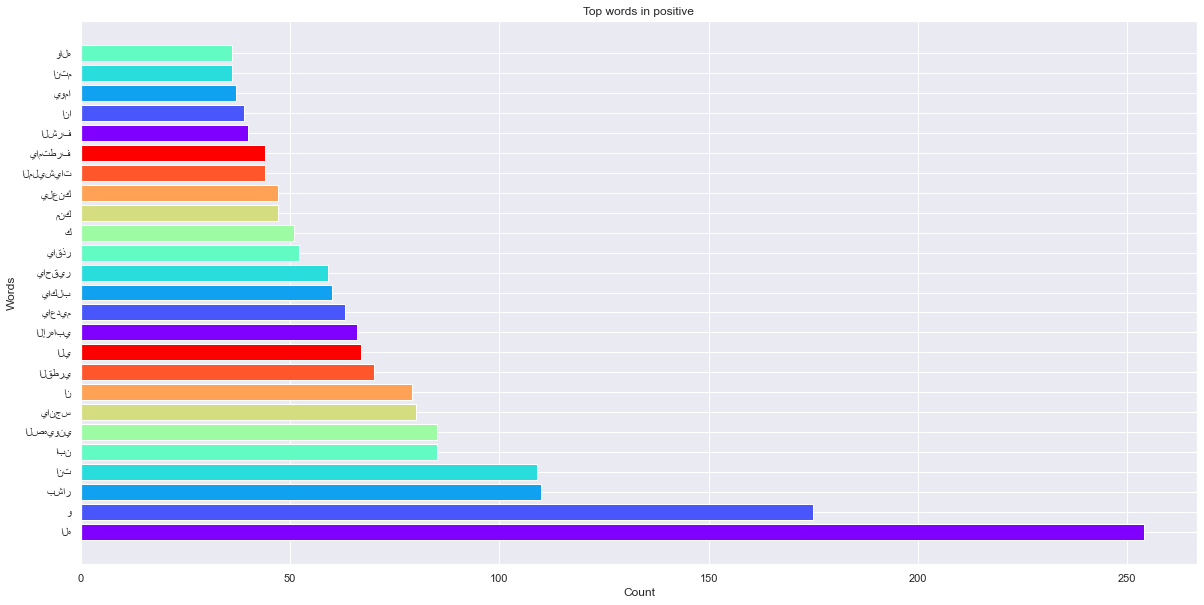

In [45]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in positive')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)


In [46]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)

In [47]:
unigramdataGet= word_vectorizer.fit_transform(data['phrase'].astype('str'))
unigramdataGet = unigramdataGet.toarray()


In [48]:
vocab = word_vectorizer.get_feature_names()
unigramdata_features=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features[unigramdata_features>0] = 1


In [49]:
unigramdata_features.head()

,10,12,14,16,17,180درجة,1898,20,201,2018,...,٢٠,٢٠١م,٤٥,چه,کافر,کل,گالزجاجة,یا,یاکافر,یطفي
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
pro= preprocessing.LabelEncoder()
data['class'].replace({-1:2}, inplace=True)
encpro=pro.fit_transform(data['class'])
data['class'] = encpro


In [51]:
y=data['class']
X=unigramdata_features
y

0       1
1       0
2       0
3       1
4       0
       ..
2065    0
2066    0
2067    0
2068    0
2069    0
Name: class, Length: 2070, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [54]:
# *** l'arbre de décision (DTREE) : *** #

In [55]:
RF=RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,random_state=10)
RF= RF.fit(X_train , y_train)
RF

RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,
                       random_state=10)

In [57]:
y_pred = RF.predict(X_test)
RF_1= RF.score(X_test, y_test)

print('Accuracy= {:.3f}'.format(RF.score(X_test, y_test)))
print("Precision Score : ",precision_score(y_test, y_pred, average=None))
print("recall_score : ",recall_score(y_test, y_pred, average=None))
print("F1 : ",f1_score(y_test, y_pred, average=None))

CR=classification_report(y_test, y_pred)
print(CR)
print('\n')

Accuracy= 0.635
Precision Score :  [0.        0.6352657 0.       ]
recall_score :  [0. 1. 0.]
F1 :  [0.         0.77695716 0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.64      1.00      0.78       263
           2       0.00      0.00      0.00       115

    accuracy                           0.64       414
   macro avg       0.21      0.33      0.26       414
weighted avg       0.40      0.64      0.49       414





In [58]:
# *** Naïve Bayes (NB) : *** #

In [59]:
NB=GaussianNB()
NB= NB.fit(X_train , y_train)
NB

GaussianNB()

In [60]:
y_pred = NB.predict(X_test)
NB_1=NB.score(X_test, y_test)

print('Accuracy= {:.3f}'.format(NB.score(X_test, y_test)))
print("Precision Score : ",precision_score(y_test, y_pred, average=None))
print("recall_score : ",recall_score(y_test, y_pred, average=None))
print("F1 : ",f1_score(y_test, y_pred, average=None))

CR=classification_report(y_test, y_pred)
print(CR)
print('\n')



Accuracy= 0.758
Precision Score :  [0.75       0.80740741 0.65      ]
recall_score :  [0.5        0.82889734 0.67826087]
F1 :  [0.6        0.81801126 0.66382979]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        36
           1       0.81      0.83      0.82       263
           2       0.65      0.68      0.66       115

    accuracy                           0.76       414
   macro avg       0.74      0.67      0.69       414
weighted avg       0.76      0.76      0.76       414





In [61]:
# *** Support Victor Machine (SVM) : *** #

In [62]:
SVM=LinearSVC(C=1, max_iter=500)
SVM= SVM.fit(X_train , y_train)
SVM

LinearSVC(C=1, max_iter=500)

In [63]:
y_pred = SVM.predict(X_test)
SVM_1=SVM.score(X_test, y_test)

print('Accuracy= {:.3f}'.format(SVM.score(X_test, y_test)))
print("Precision Score : ",precision_score(y_test, y_pred, average=None))
print("recall_score : ",recall_score(y_test, y_pred, average=None))
print("F1 : ",f1_score(y_test, y_pred, average=None))

CR=classification_report(y_test, y_pred)
print(CR)
print('\n')


Accuracy= 0.932
Precision Score :  [0.9375     0.92418773 0.95238095]
recall_score :  [0.83333333 0.97338403 0.86956522]
F1 :  [0.88235294 0.94814815 0.90909091]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        36
           1       0.92      0.97      0.95       263
           2       0.95      0.87      0.91       115

    accuracy                           0.93       414
   macro avg       0.94      0.89      0.91       414
weighted avg       0.93      0.93      0.93       414





In [64]:
# *** Régression Logistique (LR) : *** #

In [65]:
RL= LogisticRegression(penalty = 'l2', C = 1)
RL= RL.fit(X_train , y_train)
RL

LogisticRegression(C=1)

In [66]:
y_pred = RL.predict(X_test)
RL_1=RL.score(X_test, y_test)

print('Accuracy= {:.3f}'.format(RL.score(X_test, y_test)))
print("Precision Score : ",precision_score(y_test, y_pred, average=None))
print("recall_score : ",recall_score(y_test, y_pred, average=None))
print("F1 : ",f1_score(y_test, y_pred, average=None))

CR=classification_report(y_test, y_pred)
print(CR)
print('\n')


Accuracy= 0.923
Precision Score :  [1.         0.90526316 0.95192308]
recall_score :  [0.69444444 0.98098859 0.86086957]
F1 :  [0.81967213 0.94160584 0.90410959]
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        36
           1       0.91      0.98      0.94       263
           2       0.95      0.86      0.90       115

    accuracy                           0.92       414
   macro avg       0.95      0.85      0.89       414
weighted avg       0.93      0.92      0.92       414





In [67]:
# *** K plus proches voisins (KNN) : *** #

In [69]:
KNN = KNeighborsClassifier()
KNN= KNN.fit(X_train , y_train)
KNN

KNeighborsClassifier()

In [70]:
y_pred = KNN.predict(X_test)
KNN_1=RL.score(X_test, y_test)

print('Accuracy= {:.3f}'.format(KNN.score(X_test, y_test)))
print("Precision Score : ",precision_score(y_test, y_pred, average=None))
print("recall_score : ",recall_score(y_test, y_pred, average=None))
print("F1 : ",f1_score(y_test, y_pred, average=None))

CR=classification_report(y_test, y_pred)
print(CR)
print('\n')

Accuracy= 0.809
Precision Score :  [1.         0.796875   0.84946237]
recall_score :  [0.02777778 0.96958175 0.68695652]
F1 :  [0.05405405 0.87478559 0.75961538]
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        36
           1       0.80      0.97      0.87       263
           2       0.85      0.69      0.76       115

    accuracy                           0.81       414
   macro avg       0.88      0.56      0.56       414
weighted avg       0.83      0.81      0.77       414





In [1]:
P=PrettyTable()
print('\n')
print(" Comparaison de tous les algorithmes :")
P.field_names = ["Modèle", "Accuracy"]


P.add_row(["L'arbre de décision (DTREE) :", round(RF_1,2)])
P.add_row(["Naïve Bayes (NB) :",  round(NB_1,2)])
P.add_row(["Support Victor Machine (SVM) :", round(SVM_1,2)])
P.add_row(["Régression Logistique (LR) :", round(RL_1,2)])
P.add_row(["K plus proches voisins (KNN) :", round(KNN_1,2)])

print(P)
print('\n')

NameError: name 'PrettyTable' is not defined

In [76]:
SVM=LinearSVC(C=1, max_iter=500)
SVM= SVM.fit(X_train , y_train)

In [77]:
testing=['ضربُ النِّساء فعلٌ قبيح، وهو ساقطٌ من أعداد الرجال بل هو أقرب للحيوان منهُ']

In [78]:
x = word_vectorizer.transform(testing)

In [79]:
pred=SVM.predict(x)
pred=pro.inverse_transform(pred)
prediction=pd.DataFrame(pred, columns=['class']) 
print (prediction)

   class
0      1


In [80]:
result=pd.DataFrame()
result['Text']=testing
result['Prediction']=prediction
result


,Text,Prediction
0,ضربُ النِّساء فعلٌ قبيح، وهو ساقطٌ من أعداد ال...,1
